## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# I have been hired by a Real Estate Investing company to look into the data of the county in which they operate 
# and tell them what should be their main focus and two actionable steps that aligns with their main focus and
# is also the most profitable for them and their investors.

In [2]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv')

df.head()

# Taking an initial look at the Data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()
# Floors, waterfront, view, condition, grade are most likely going to have data type changed to categorical or boolean.
# Lat and long will have to look at to see if are necessary. ID is going to have to be dropped.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.drop(['id', 'view'], axis=1, inplace=True)
df.info()
#Why is sqft_basement an object? That will have to be changed.
#Also dropping ID as will not be used going forward
#Dropping view as the fact that a house has been viewed or not is irrelivant

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(2)
memory usage: 3.1+ MB


In [5]:
df.isna().sum()
# The null values, especially the view column seem insignifigant. I'll probably end up removing the null view values,
# split waterfront evenly since its one of two values(will also be categorical values after scrubbing data), and finally
# evenly distribute yr_renovated amongst values evenly since getting rid of about 20% of the data will affect the data
# it but adding about 50 to each column shouldnt alter the data signifigantly

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')
df.info()
#Changed data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


In [7]:
df.isna().sum()
# The data type change ended up adding NaN values. Will just change those to 0 given the data and small amount of them.

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df.waterfront.value_counts(normalize=True)
# Checking to see the impact of NaN data so that I know how to handle the data

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [9]:
df.yr_renovated.value_counts(normalize=True)
# Checking to see the impact of NaN data so that I know if distributing the NaN data is feasable. It is not.

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
2000.0    0.001633
2005.0    0.001633
1990.0    0.001239
2004.0    0.001239
2009.0    0.001183
1989.0    0.001126
2006.0    0.001126
2002.0    0.000957
1991.0    0.000901
1998.0    0.000901
1984.0    0.000901
1999.0    0.000845
2008.0    0.000845
2010.0    0.000845
2001.0    0.000845
1983.0    0.000845
2015.0    0.000789
1985.0    0.000789
1986.0    0.000789
1987.0    0.000789
1994.0    0.000789
1992.0    0.000732
1993.0    0.000676
1997.0    0.000676
1995.0    0.000676
            ...   
1975.0    0.000282
1964.0    0.000282
1969.0    0.000225
1963.0    0.000225
1973.0    0.000225
1981.0    0.000225
1965.0    0.000225
1978.0    0.000169
1960.0    0.000169
1958.0    0.000169
1956.0    0.000169
1955.0    0.000169
1945.0    0.000169
1972.0    0.000169
1967.0    0.000113
1957.0    0.000113
1940.0    0.000113
1974.0    0.000113
1962.0    0.000113
1953.0    0.000056
1950.0    0.000056
1934.0    0.

In [10]:
df.fillna(value=0, inplace=True)
df.isna().sum()

# Changed values to 0
# Because there was so little homes with a view I just filled the NaN values with 0
# After further investigation, adding an even amount to each would alter the data for this column(yr_renovated). 
# I elected to replace the data with 0 as well I did not want to sacrifice 20% of my rows of information. 

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.info()
#verifying changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidth=.5, cbar_kws={'shrink': .5});

#I created a heat map to get a good overview of what the correlation between the data is showing
# there are a lot of highly correlated data but I do not want to drop any since they are typical for the industry
# for example the more rooms you have directly affects the price. The only curiosity I see is price and latitude. 
# It is possible the more affluent neighborhoods are to the north or south as their is a noticable correlation 
# there. I will keep all the data since there is nothing that stands out to be removed.

In [13]:
norm = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

for column in norm:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
# I normalize all data that is numeric and that wont be one hot encoded

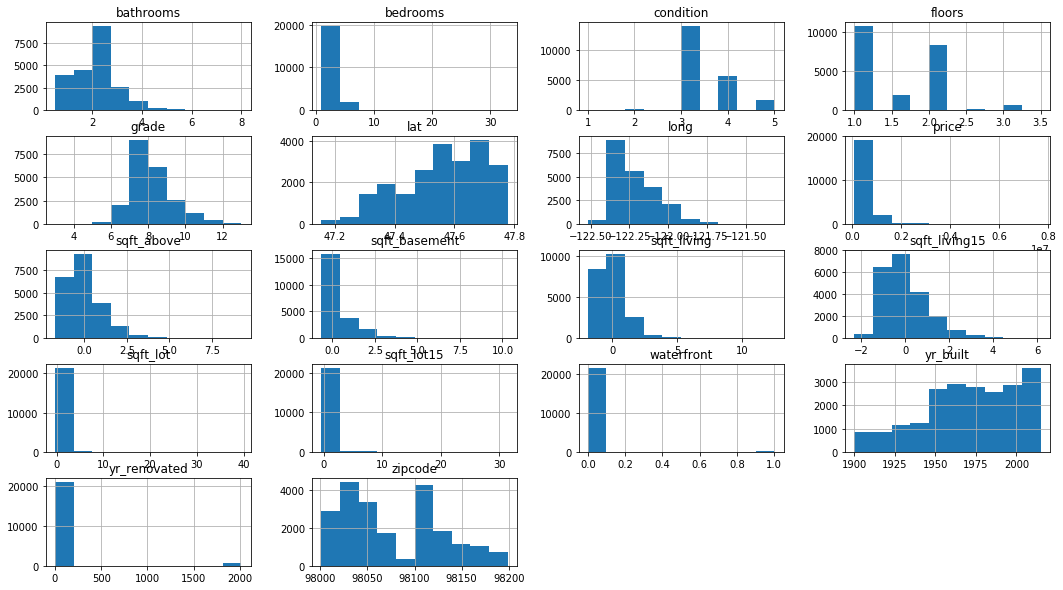

In [14]:
df.hist(figsize=(18,10));

# Checing to see the data was normalized and how the distributions are looking so that I have an idea
# of which columns can be used as predictors in my model.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


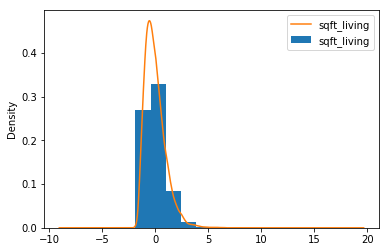

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


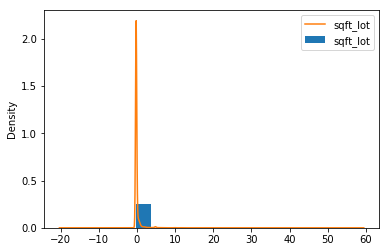

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


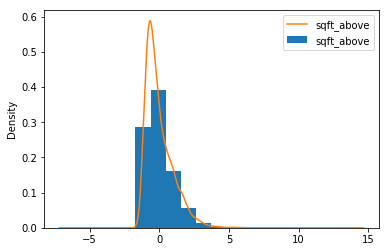

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


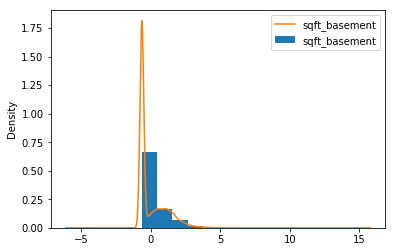

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


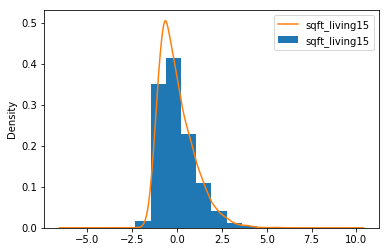

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


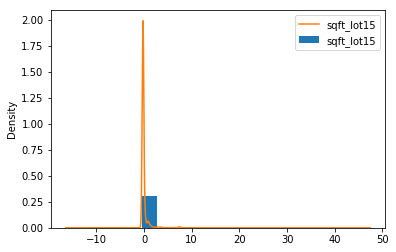

In [15]:
for column in norm:
    df[column].plot.hist(normed=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show();
    
# Using a KDE plot on the data I just normalized, I can see that more bins will be needed to accurately asses
# the graphs as too much data lies in one or two bins.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


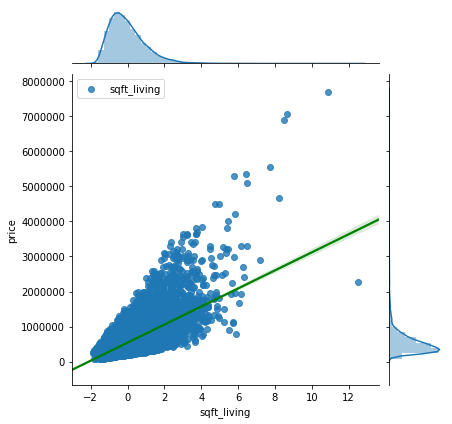

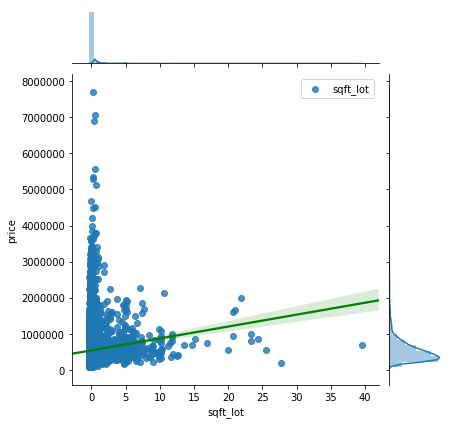

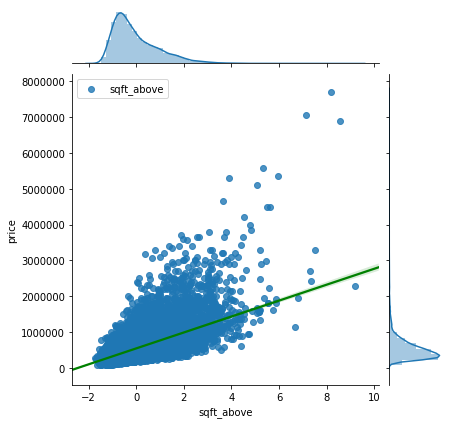

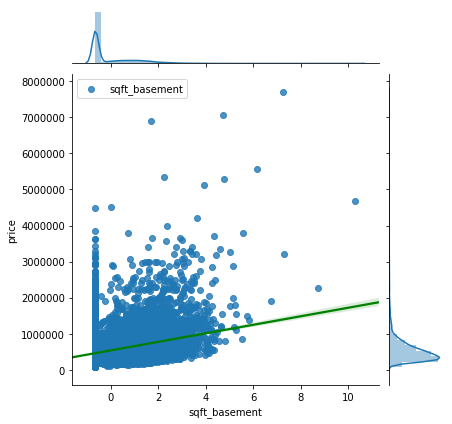

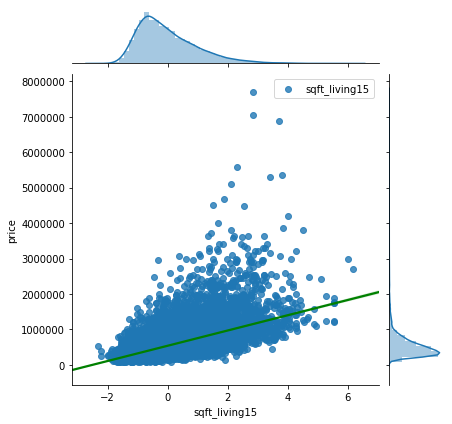

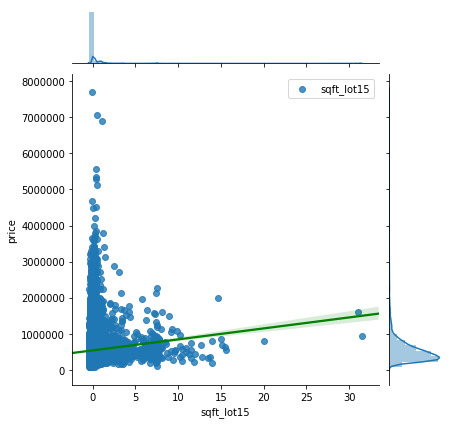

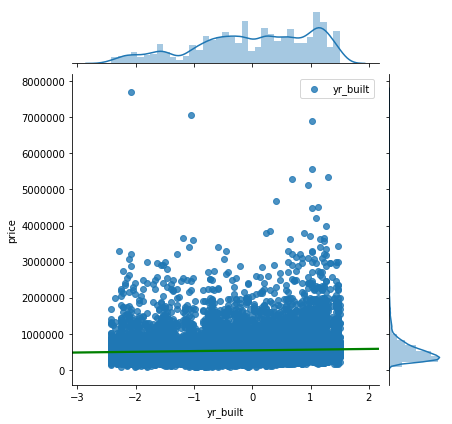

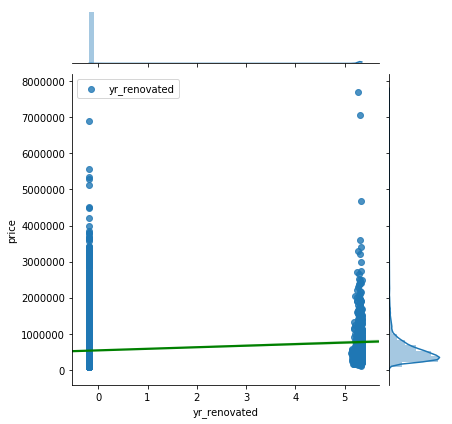

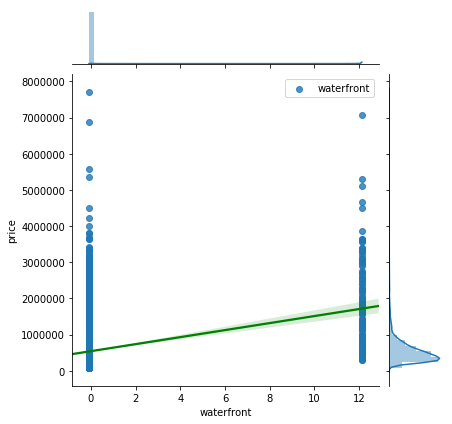

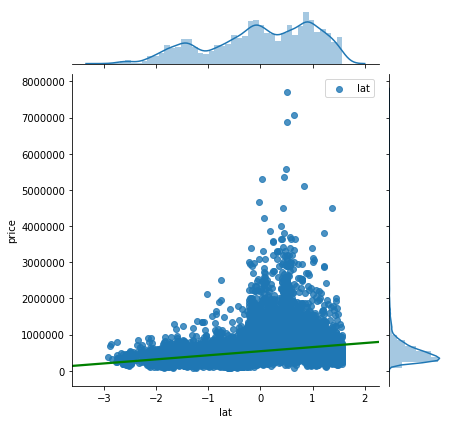

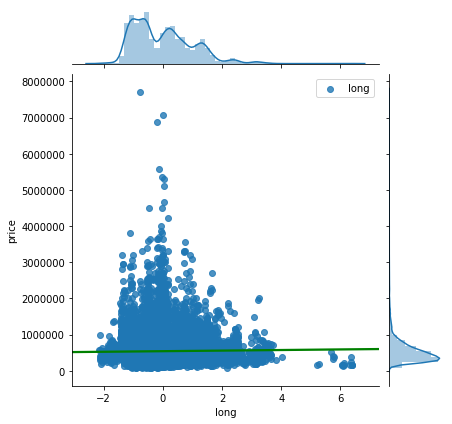

In [16]:
norm2 = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'waterfront', 'lat', 'long']

for column in norm2:
    df[column] = (df[column] - df[column].mean()) / df[column].std()

for column in norm2:
    sns.jointplot(x=column, y='price', data=df, kind='reg', label=column, joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show();
    
# Here I show how each column's relationship to price to see which have a strong enough relationship to consider
# further while doing analysis
# Long, zipcode, condition, yr_renovated, yr_built have next to no relationship
# view, floors, sqft_lot15, and sqft_lot have a slight relationship but will need to be looked at further

In [17]:
import statsmodels.formula.api as smf

col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])

pd.DataFrame(results)

# I am getting the model info on all the columns. This includes columns that I am going to one hot encode later
# I will remove any insignifigant r-values and any p-values that are not worthy.

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0953497,127200,122464,0
2,bathrooms,0.276577,8712.65,251242,0
3,sqft_living,0.492688,540297,257862,0
4,sqft_lot,0.00807774,540297,33017.7,5.57162e-40
5,floors,0.0659481,279115,174809,0
6,waterfront,0.0698578,540297,97097.7,0
7,condition,0.00130006,470868,20361.3,1.15656e-07
8,grade,0.446158,-1.06142e+06,209158,0
9,sqft_above,0.36647,540297,222393,0


In [18]:
df['price'] = np.log(df['price'])

col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])

pd.DataFrame(results)

#here I normalize the price column to see how it affects the results of the model
# The results are insignifigant. I am will eventually create a new df so that I can easily access the 
#actual price of the homes to provide deeper insights in the presentation. 

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.117896,12.3898,0.195183,0
2,bathrooms,0.303876,12.2496,0.377463,0
3,sqft_living,0.483282,13.0482,0.366053,0
4,sqft_lot,0.0100049,13.0482,0.0526685,3.80448e-49
5,floors,0.096491,12.5954,0.303074,0
6,waterfront,0.0291453,13.0482,0.0898934,6.30341e-141
7,condition,0.00151463,12.9408,0.0315006,1.05756e-08
8,grade,0.495222,10.6295,0.315843,0
9,sqft_above,0.361898,13.0482,0.316764,0


In [19]:
df.drop(['waterfront', 'long', 'yr_renovated', 'yr_built', 'sqft_lot15', 'sqft_lot'], axis=1, inplace=True)

df.info()
# Dropping all the data that has a signifigantly low relationship to price.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null float64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null float64
sqft_basement    21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
sqft_living15    21597 non-null float64
dtypes: float64(8), int64(4), object(1)
memory usage: 2.1+ MB


In [20]:
df.head()

# Checking to see that the changes were made to the datafromes columns

,date,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,zipcode,lat,sqft_living15
0,10/13/2014,12.309982,3,1.00,-0.980629,1.0,3,7,-0.735234,-0.649622,98178,-0.352886,-0.943654
1,12/9/2014,13.195614,3,2.25,0.533357,2.0,3,7,0.460766,0.259841,98125,1.161349,-0.432877
2,2/25/2015,12.100712,2,1.00,-1.427201,1.0,3,6,-1.230546,-0.649622,98028,1.283325,1.070267
3,12/9/2014,13.311329,4,3.00,-0.131054,1.0,5,7,-0.892284,1.419407,98136,-0.283598,-0.914467
4,2/18/2015,13.142166,3,2.00,-0.436030,1.0,3,8,-0.131194,-0.649622,98074,0.409284,-0.272347


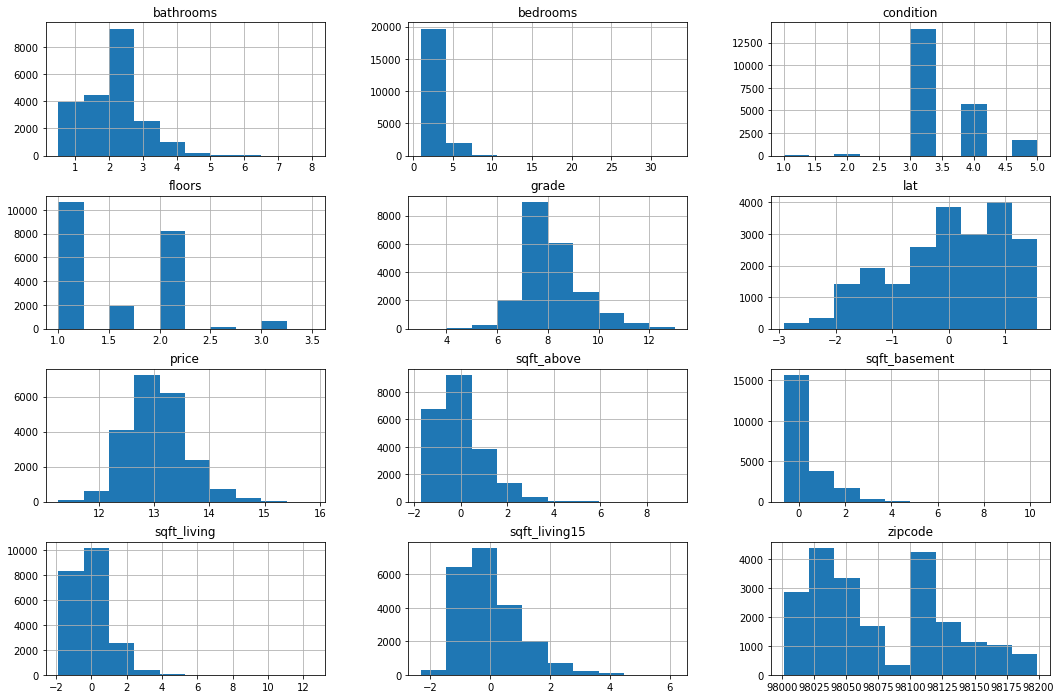

In [21]:
df.hist(figsize=(18,12));

# Checking to make sure that the normalization has taken effect on the columns I normalized.

In [22]:
df.loc[df['bathrooms'] == 0.5, 'bathrooms'] = '0_5'
df.loc[df['bathrooms'] == 0.75, 'bathrooms'] = '0_75'
df.loc[df['bathrooms'] == 1.0, 'bathrooms'] = '1'
df.loc[df['bathrooms'] == 1.25, 'bathrooms'] = '1_25'
df.loc[df['bathrooms'] == 1.5, 'bathrooms'] = '1_5'
df.loc[df['bathrooms'] == 1.75, 'bathrooms'] = '1_75'
df.loc[df['bathrooms'] == 2.0, 'bathrooms'] = '2'
df.loc[df['bathrooms'] == 2.25, 'bathrooms'] = '2_25'
df.loc[df['bathrooms'] == 2.5, 'bathrooms'] = '2_5'
df.loc[df['bathrooms'] == 2.75, 'bathrooms'] = '2_75'
df.loc[df['bathrooms'] == 3.0, 'bathrooms'] = '3'
df.loc[df['bathrooms'] == 3.25, 'bathrooms'] = '3_25'
df.loc[df['bathrooms'] == 3.5, 'bathrooms'] = '3_5'
df.loc[df['bathrooms'] == 3.75, 'bathrooms'] = '3_75'
df.loc[df['bathrooms'] == 4.0, 'bathrooms'] = '4'
df.loc[df['bathrooms'] == 4.25, 'bathrooms'] = '4_25'
df.loc[df['bathrooms'] == 4.5, 'bathrooms'] = '4_5'
df.loc[df['bathrooms'] == 4.75, 'bathrooms'] = '4_75'
df.loc[df['bathrooms'] == 5.0, 'bathrooms'] = '5'
df.loc[df['bathrooms'] == 5.25, 'bathrooms'] = '5_25'
df.loc[df['bathrooms'] == 5.5, 'bathrooms'] = '5_5'
df.loc[df['bathrooms'] == 5.75, 'bathrooms'] = '5_75'
df.loc[df['bathrooms'] == 6.0, 'bathrooms'] = '6'
df.loc[df['bathrooms'] == 6.25, 'bathrooms'] = '6_25'
df.loc[df['bathrooms'] == 6.5, 'bathrooms'] = '6_5'
df.loc[df['bathrooms'] == 6.75, 'bathrooms'] = '6_75'
df.loc[df['bathrooms'] == 7.0, 'bathrooms'] = '7'
df.loc[df['bathrooms'] == 7.25, 'bathrooms'] = '7_25'
df.loc[df['bathrooms'] == 7.5, 'bathrooms'] = '7_5'
df.loc[df['bathrooms'] == 7.75, 'bathrooms'] = '7_75'
df.loc[df['bathrooms'] == 8.0, 'bathrooms'] = '8'

df.loc[df['floors'] == 1.0, 'floors'] = '1'
df.loc[df['floors'] == 1.5, 'floors'] = '1_5'
df.loc[df['floors'] == 2.0, 'floors'] = '2'
df.loc[df['floors'] == 2.5, 'floors'] = '2_5'
df.loc[df['floors'] == 3.0, 'floors'] = '3'
df.loc[df['floors'] == 3.5, 'floors'] = '3_5'

df.head()

# In order to one hot encode these columns there cannot be any decimal points as will cause an error
# I remove those in all int64 columns that have a decimal point and verify the results

,date,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,zipcode,lat,sqft_living15
0,10/13/2014,12.309982,3,1,-0.980629,1,3,7,-0.735234,-0.649622,98178,-0.352886,-0.943654
1,12/9/2014,13.195614,3,2_25,0.533357,2,3,7,0.460766,0.259841,98125,1.161349,-0.432877
2,2/25/2015,12.100712,2,1,-1.427201,1,3,6,-1.230546,-0.649622,98028,1.283325,1.070267
3,12/9/2014,13.311329,4,3,-0.131054,1,5,7,-0.892284,1.419407,98136,-0.283598,-0.914467
4,2/18/2015,13.142166,3,2,-0.436030,1,3,8,-0.131194,-0.649622,98074,0.409284,-0.272347


In [23]:
df['bedrooms'] = df['bedrooms'].astype('category')
df['bathrooms'] = df['bathrooms'].astype('category')
df['floors'] = df['floors'].astype('category')
df['grade'] = df['grade'].astype('category')
df['zipcode'] = df['zipcode'].astype('category')
df['condition'] = df['condition'].astype('category')

# Changing category types so that they can create dummies for later

In [24]:
df = pd.get_dummies(df, columns=['bathrooms', 'floors', 'condition'])
zip_dummies = pd.get_dummies(df["zipcode"], prefix= 'zip')
bed_dummies = pd.get_dummies(df["bedrooms"], prefix= 'bed')
grade_dummies = pd.get_dummies(df["grade"], prefix= 'grade')
df = pd.concat([df, zip_dummies, bed_dummies, grade_dummies], axis=1)
# one hot encode the columns that I feel need it and verify the results
# I came back and assigned the dummies for zipcode, grade, and bedrooms so that they are easier to impliment in the 
# final model

In [53]:
cols_bed = df.columns[120:131]
cols_bath = df.columns[10:37]
cols_floors = df.columns[39:44]
cols_grade = df.columns[132:-1]
cols_zipcode = df.columns[50:119]
cols_con = df.columns[45:49]

cols = [cols_grade, cols_bath, cols_floors, cols_zipcode, cols_con, cols_bed]

for col in cols:
    sum_cols = "+".join(col)
    f = 'price~' + sum_cols
    model = smf.ols(formula = f, data= df).fit()
    print(model.summary())
    
# I run an OLS model on the one hot encoded columns to see signifigance and what needs to be dropped due to 
# having insignifigant relationship

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2135.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        21:25:22   Log-Likelihood:                -9365.6
No. Observations:               21597   AIC:                         1.875e+04
Df Residuals:                   21586   BIC:                         1.884e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0282      0.104    145.102      0.0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     351.7
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        21:25:23   Log-Likelihood:                -8640.7
No. Observations:               21597   AIC:                         1.742e+04
Df Residuals:                   21527   BIC:                         1.798e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4874      0.020    664.099      0.0

In [26]:
# The building grade is tied for the highest individual r-value. This is going to answer the question of 
# what their main focus should be. This is the least actionable predictor as it is so vague. The King County website 
# provides a little bit of insight into what helps increase the grade. It essentailly comes down to renovation
# and increasing the sqft of a home. While renovation is also vague, the sqft is considerably more actionable
# and is also tied with this predictor for the highest r-value. I will get more in depth with that later in the notebook.

In [27]:
y = df[['price']]
X = df.drop(['price', 'date'], axis = 1)
X.head()

# Here I am setting up to check the validity of my data.

,bedrooms,sqft_living,grade,sqft_above,sqft_basement,zipcode,lat,sqft_living15,bathrooms_0_5,bathrooms_0_75,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,3,-0.980629,7,-0.735234,-0.649622,98178,-0.352886,-0.943654,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3,0.533357,7,0.460766,0.259841,98125,1.161349,-0.432877,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,-1.427201,6,-1.230546,-0.649622,98028,1.283325,1.070267,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,-0.131054,7,-0.892284,1.419407,98136,-0.283598,-0.914467,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3,-0.436030,8,-0.131194,-0.649622,98074,0.409284,-0.272347,0,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [29]:
r_list = []
adj_r = []
n_list = list(range(5,136,10))

for n in n_list:
    select_n = RFE(linreg, n_features_to_select= n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_]
    linreg.fit(X[selected_columns], y)
    yhat = linreg.predict(X[selected_columns])
    SSR = np.sum((y-yhat)**2)
    SST = np.sum((y-np.mean(y))**2)
    r2 = 1 - (float(SSR)) / SST
    ar2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(r2, ar2)
r_list.append(r2)
adj_r.append(ar2)

# Here I am making sure that in adding more predictors will not cause overfitting.

price    0.375619
dtype: float64 price    0.371515
dtype: float64
price    0.49771
dtype: float64 price    0.494409
dtype: float64
price    0.504958
dtype: float64 price    0.501704
dtype: float64
price    0.521895
dtype: float64 price    0.518752
dtype: float64
price    0.554716
dtype: float64 price    0.55179
dtype: float64
price    0.555374
dtype: float64 price    0.552452
dtype: float64
price    0.565033
dtype: float64 price    0.562175
dtype: float64
price    0.678885
dtype: float64 price    0.676774
dtype: float64
price    0.747339
dtype: float64 price    0.745679
dtype: float64
price    0.781383
dtype: float64 price    0.779947
dtype: float64
price    0.840381
dtype: float64 price    0.839332
dtype: float64
price    0.84901
dtype: float64 price    0.848018
dtype: float64
price    0.859586
dtype: float64 price    0.858663
dtype: float64
price    0.861341
dtype: float64 price    0.86043
dtype: float64


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
n_list = list(range(5,136,10))

for n in n_list:
    select_n = RFE(linreg, n_features_to_select= n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_]
    linreg.fit(X_train[selected_columns], y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train, mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

# Here I am checking to see if there is any signifigant divergance in test and train datasets so that I 
# know that I can depend on the model that I have created. 

price    0.274104
dtype: float64 price    0.271074
dtype: float64
price    0.133076
dtype: float64 price    0.134625
dtype: float64
price    0.129368
dtype: float64 price    0.130897
dtype: float64
price    0.124599
dtype: float64 price    0.127031
dtype: float64
price    0.095049
dtype: float64 price    0.097425
dtype: float64
price    0.07527
dtype: float64 price    0.076195
dtype: float64
price    0.066133
dtype: float64 price    0.067356
dtype: float64
price    0.046572
dtype: float64 price    0.048649
dtype: float64
price    0.043081
dtype: float64 price    0.044481
dtype: float64
price    0.041492
dtype: float64 price    0.042887
dtype: float64
price    0.038859
dtype: float64 price    0.040339
dtype: float64
price    0.038661
dtype: float64 price    0.040124
dtype: float64
price    0.038439
dtype: float64 price    0.040109
dtype: float64
price    0.038207
dtype: float64 price    0.039861
dtype: float64


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

select_135 = RFE(linreg, n_features_to_select = 135)
select_135 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

# I am checking to see how well the model I have built holds up with cross fold validation.

array([-4.03185183e-02, -1.21149944e+20, -3.99184121e-02, -6.77529237e+16,
       -1.03217339e+15, -4.03146645e-02, -3.79796755e-02, -7.59250627e+17,
       -3.90878120e-02, -2.53849484e+15])

In [32]:
df2 = pd.read_csv('kc_house_data.csv')

df2.head()

# I am creating a new dataframe so that I can get actual numbers to use in the presentation as apposed to the 
# normalized data that will not be well suited for a non technical crowd.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


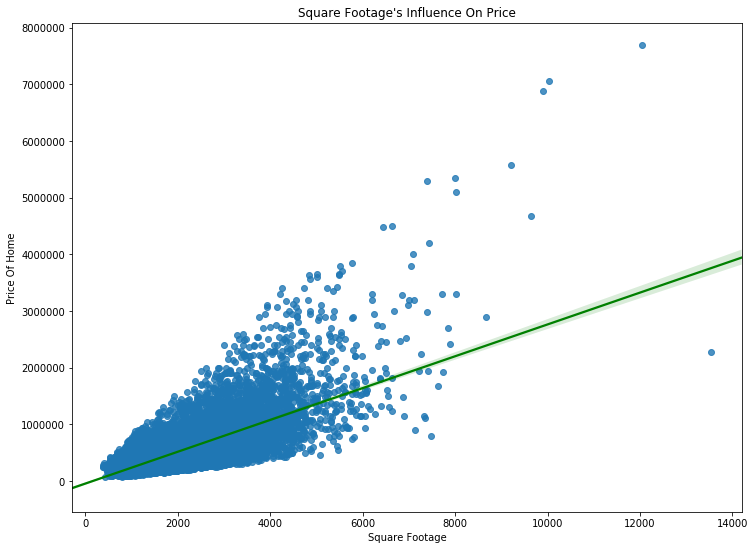

In [33]:
x = df2.sqft_living
y = df2.price

plt.figure(figsize=(12,9))

sns.regplot(x, y, line_kws={"color" : "g"})
plt.xlabel('Square Footage')
plt.ylabel('Price Of Home')
plt.title("Square Footage's Influence On Price");

# This graph is able to show the positive correlation between the sqft of a home and the price. This graph is 
# relevant for the question of how to increase the value of a home with an actionable step. This individual 
# predictor is tied for the highest r-value but is by far the most concrete and actionable(compared to increase
# building grade or choosing the best zipcode)

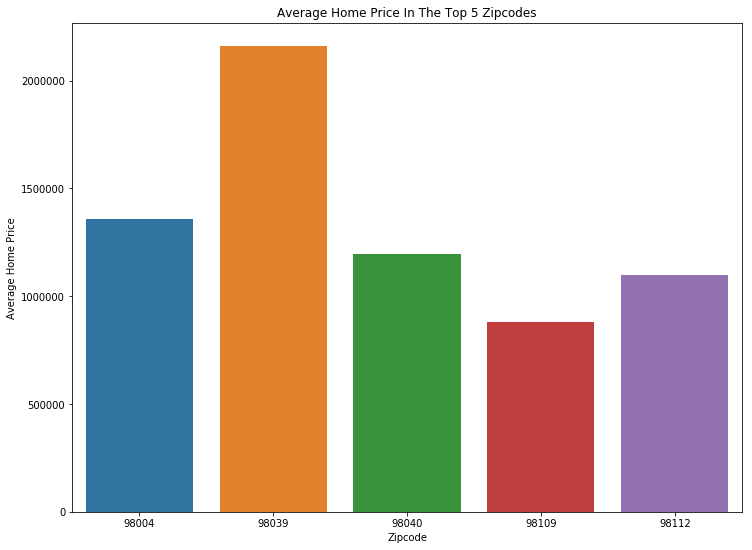

In [34]:
zips = [98004, 98039, 98040, 98112, 98109]
x = np.array(list(zips))
y = []

for i in zips:
    zippy = df2.loc[df2['zipcode'] == i]
    zippy_mean = zippy.price.mean()
    y.append(zippy_mean)

plt.figure(figsize=(12,9))    
sns.barplot(x,y)
plt.xlabel("Zipcode")
plt.ylabel("Average Home Price")
plt.title('Average Home Price In The Top 5 Zipcodes');

# This graph shows the average home value in each of the top 5 zipcodes. Their top 5 rank is determined by
# the highest coeffecient of all zip codes. I am showing the average home value as a non technical presentee
# is likely more concerned with the actual home values as opposed to the coeffecient. The zipcodes are also in 
# the three way tie for highest individual r-value once they have been one hot encoded. I used a new dataframe as 
# the home price was normalized and the name of each zipcode is clunky looking on the dataframe used for the model. 
# This answers the question of what the second actionable step they can take: Focus on the zipcodes that will
# provide the most profits and increase the probability of an ROI for their investors.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


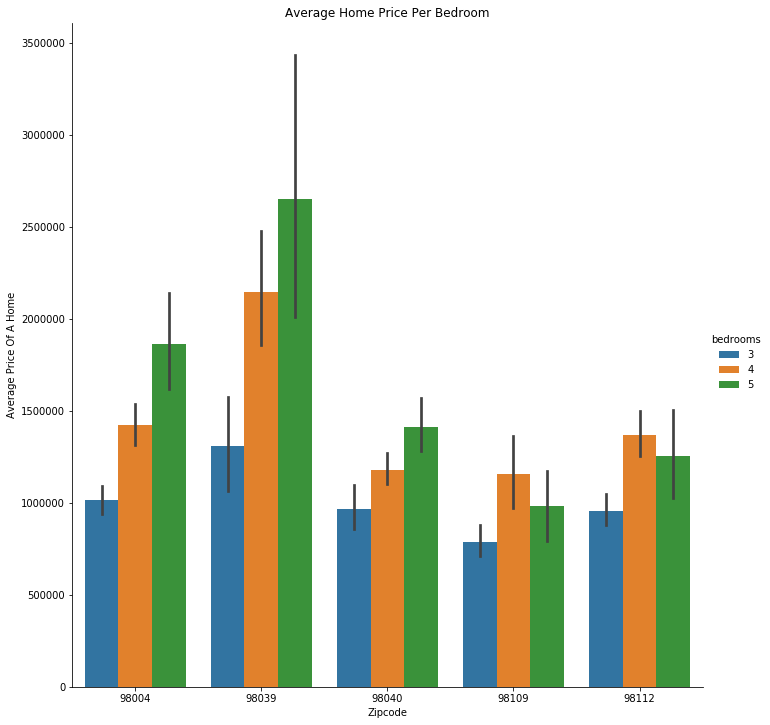

In [35]:
df2 = df2.loc[df2.zipcode.isin([98004, 98039, 98040, 98112, 98109])]
df2 = df2.loc[df2.bedrooms.isin([3,4,5])]

sns.catplot(x='zipcode', y='price', hue='bedrooms', data= df2, kind = 'bar', height=10)
plt.ylabel('Average Price Of A Home')
plt.xlabel('Zipcode')
plt.title('Average Home Price Per Bedroom');

# This graph is showing the average home values for each zipcode and the three most relevant bedroom sizes in 
# each zipcode. The relevance is determined by two factors: the biggest difference in coefficients between two 
# sequential bedroom sizes combined with a relevant amount of homes in the zipcode for that bedroom category. 
# Doing so does not allow for a large difference in coeffecients if the higher bedroom size is not supported
# by a signifigant percentage of homes in that zipcode. This is important for the homes resale so will matter to the
# company that hired me to provide them with insights. This will be very actionable and valueable to them.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


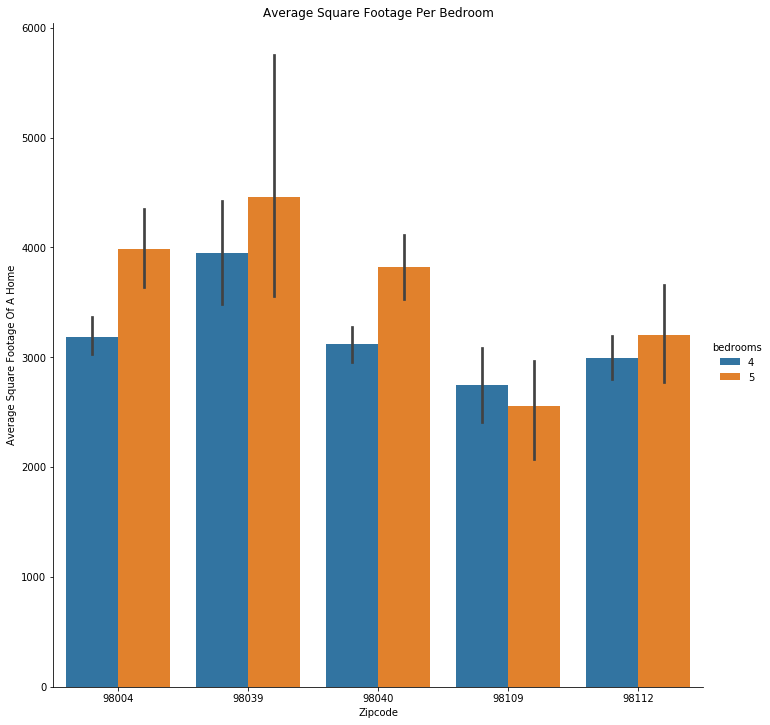

In [36]:
df2 = df2.loc[df2.zipcode.isin([98004, 98039, 98040, 98112, 98109])]
df2 = df2.loc[df2.bedrooms.isin([4,5])]

sns.catplot(x='zipcode', y='sqft_living', hue='bedrooms', data= df2, kind = 'bar', height=10)
plt.ylabel('Average Square Footage Of A Home')
plt.xlabel('Zipcode')
plt.title('Average Square Footage Per Bedroom');

# This graph shows the average sqft of each bedroom size in each zipcode. I am incorperating this graph into
# the presentation because while the above graph is super actionable, it's main focus was to improve the overall
# sqft of each redevelopment. This is almost a warning that while adding a bedroom will increase the home value,
# the sqft needs to meet these averages becuase the sqft of a home has a signifigantly higher r-value and
#therfore must not be overlooked even if it is less actionable.

OSEMN PROCESS

Obtain:

I started by getting the understanding of what the Real Estate Investing company wanted from me. While they were not specific questions, they were questions that could be answered with the dataset that was given to me. I obtained the csv file twice in this notebook. Once to get the dataframe and modify it to create my model and the second to provide the actual numbers that are more easily digestable for the non technical crowd.

Scrub/Explore:

During this stage I initially focused on the scrubbing element of the OSEMN process by figuring out which columns had NaN values and dealing with those on a case by case value that is listed above. From there, in a combination of the two steps I then went to through and updated columns as needed. Whether they needed to change the category or be removed, all steps are listed above. This allowed me to create a reliable model and required a few passes over to get right.

Model:

In modelling the data I had to made sure to run a few different models. Whether I changed the normalization of the independent variable or ran the model after one hot encoding certain columns. After, I made sure to test the model to ensure that I could add multiple predictors and it would hold up.

Interpret:

This was actually the most fun part for me. I have an interest in real estate investing so, what this data allowed me to see about the real estate in this county quickly turned into me nerding out and often times biting off more than I could chew. It did push me to create visualizations that were a little beyond my skillset at the start of this project because I knew that they are relevant in this industry given my experience.

---------------------------------------------------------------------------------------------------------------------

MODEL

I used two models due to having both numerical data as well as categorical data. For the categorical model I one hot encoded all the categorical data. The grade column's r-value held up after one hot encoding and actually ended up in the top three for highest r-values. This answers WHAT their main focus should be although it is a vague predictor, the website that explains each grade says that their is a direct relationship with one of the other three highest predictors: sqft_living. Zipcodes signifigantly increased their r-value after being one hot encoded to create the highest r-value. This answers WHERE they should focus in order to achieve their main focus and is why I chose it as a predictor. The other model was used to calculate the numerical data. I made sure to normalize price column with another model to ensure that it was not effecting the results. I took the predictor that had the highest  r-value. I was also going to take the grade column from this model but needed to make sure that because it was categorical data that the r-value held up even after it was one hot encoded. The predictor that had the third highest r-value was the sqft_living column. This answers HOW they should be achieving their main focus as a company and is why I used it as a predictor. The last predictor that I used was bedrooms. It does not have the highest r-value but given my knowledge of the industry, I know that it is a very tangible and actionable aspect when redeveloping real estate. The signifigance in this category lies in the coefficient. I targetted the highest increase in coeffecient between bedrooms while also taking into account the amount of homes that have that amount of bedrooms is a signifigant perentage.

The final model is below:

In [56]:
from statsmodels.formula.api import ols

df3 = df.loc[:, ['price', 'sqft_living']]
df3 = pd.concat([df3, zip_dummies, bed_dummies, grade_dummies], axis=1)

outcome = 'price'
predictors = df3.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1301.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        21:27:50   Log-Likelihood:                 3429.3
No. Observations:               21597   AIC:                            -6675.
Df Residuals:                   21505   BIC:                            -5940.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.9760      0.029    376.739      0.000      10.919      11.033
sqft_living     0.2380      0.003     87.028      0.000       0.233       0.243
zip_98001      -0.3232      0.011    -29.669      0.000      -0.345      -0.302
zip_98002      -0.3392      0.015    -23.151      0.000      -0.368      -0.310
zip_98003      -0.3067      0.012    -24.878      0.000      -0.331      -0.283
zip_98004       0.8019      0.012     68.548      0.000       0.779       0.825
zip_98005       0.4306      0.016     27.115      0.000       0.400       0.462
zip_98006       0.3469      0.009     36.735      0.000       0.328       0.365
zip_98007       0.3394      0.017     19.617      0.000       0.305       0.373
zip_98008       0.3711      0.012     30.253      0.000       0.347       0.395
zip_98010      -0.0371      0.020     -1.813      0.070      -0.077       0.003
zip_98011       0.1195      0.015      8.114      0.000       0.091       0.148
zip_98014       0.0181      0.018      0.983      0.326      -0.018       0.054
zip_98019       0.0080      0.015      0.538      0.591      -0.021       0.037
zip_98022      -0.1839      0.014    -13.612      0.000      -0.210      -0.157
zip_98023      -0.3553      0.009    -38.174      0.000      -0.374      -0.337
zip_98024       0.1622      0.023      7.083      0.000       0.117       0.207
zip_98027       0.1911      0.010     18.677      0.000       0.171       0.211
zip_98028       0.0947      0.012      7.723      0.000       0.071       0.119
zip_98029       0.2465      0.012     21.245      0.000       0.224       0.269
zip_98030      -0.2752      0.013    -21.368      0.000      -0.300      -0.250
zip_98031      -0.2471      0.012    -19.768      0.000      -0.272      -0.223
zip_98032      -0.3567      0.018    -19.439      0.000      -0.393      -0.321
zip_98033       0.4694      0.010     47.037      0.000       0.450       0.489
zip_98034       0.2212      0.009     24.743      0.000       0.204       0.239
zip_98038      -0.1515      0.009    -17.614      0.000      -0.168      -0.135
zip_98039       0.9642      0.029     33.065      0.000       0.907       1.021
zip_98040       0.6156      0.012     49.492      0.000       0.591       0.640
zip_98042      -0.2521      0.009    -28.303      0.000      -0.270      -0.235
zip_98045       0.0198      0.014      1.425      0.154      -0.007       0.047
zip_98052       0.3070      0.009     35.168      0.000       0.290       0.324
zip_98053       0.2579      0.010     24.787      0.000       0.237       0.278
zip_98055      -0.1845      0.013    -14.644      0.000      -0.209      -0.160
zip_98056       0.0080      0.010      0.777      0.437      -0.012       0.028
zip_98058      -0.1573      0.010    -16.171      0.000      -0.176      -0.138
zip_98059       0.0212      0.010      2.20